In [1]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv



from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.regularizers import l1_l2, l2, l1


Using TensorFlow backend.


In [2]:
df = pd.read_pickle("Dataset/Tweets.pkl")
#df = pd.read_csv('Dataset\Tweets.csv', encoding='latin-1')

In [3]:
df=df.astype(str)

In [4]:
dataset=df

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk import word_tokenize

import string

In [6]:
stopwords=["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"]

In [7]:
def clean(x):
    review_with_no_special_character = re.sub('[^a-zA-Z]',' ',str(x))
    review_in_lowercase = review_with_no_special_character.lower()
    review_in_tokens = word_tokenize(review_in_lowercase)
    review_with_no_stopwords = [word for word in review_in_tokens if not word in stopwords]
    review_in_sentence = ' '.join(review_with_no_stopwords)
    return review_in_sentence

In [8]:
dataset['Tweets'] = dataset['Tweets'].apply(lambda x:clean(x))

In [9]:
X= df[['Tweets', 'Emotion']].agg('-'.join, axis=1)
y=df['Writer']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', C=1.0, degree=3, random_state=0)
classifier.fit(X_train_vector, y_train)

SVC(kernel='linear', random_state=0)

In [13]:
import pickle
#To reuse, we can dump the model and load whenever or where-ever you want. 
#Vocabulary is also needed to vectorize the new documents while predicting the label.

# pickling the vectorizer
pickle.dump(vectorizer, open('Data/vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier, open('Data/classifier.sav', 'wb'))


In [14]:
y_pred=classifier.predict(X_test_vector)

In [15]:
ConfusionMatrix=confusion_matrix(y_test, y_pred)

In [16]:
Accuracy = float(classifier.score(X_test_vector, y_test)*100)
accuracy=Accuracy/100
print('Learning end')

Learning end


In [17]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [18]:
from sklearn.metrics import recall_score

recall=recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro')

In [19]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
print(ac)

0.8323699421965318


In [20]:
dict = {
  "Accuracy": accuracy,
  "Precision": precision,
  "Recall": recall
}

In [21]:
import pickle

file = open('Accuracies/SVM', 'wb')
pickle.dump(dict, file)
file.close()

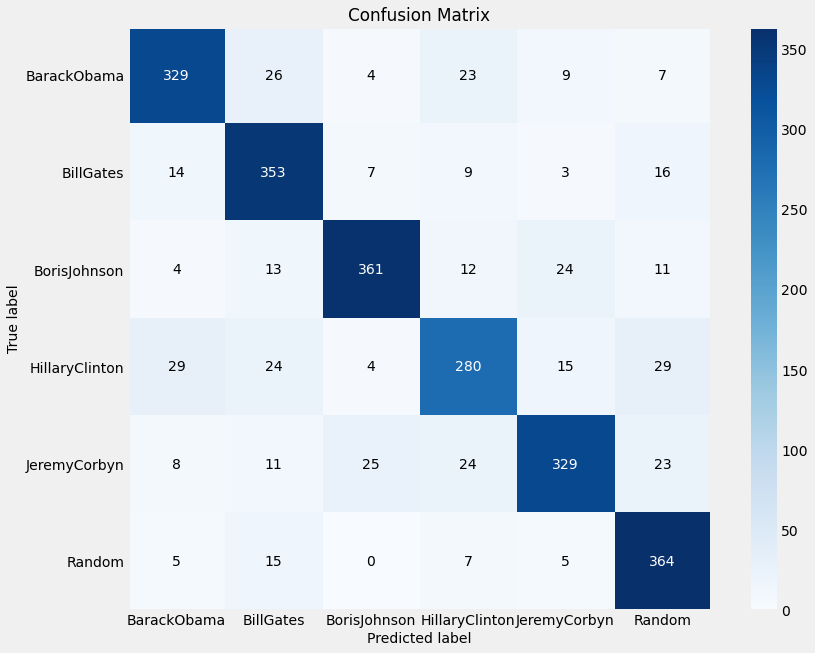

In [22]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,10))

In [23]:
#now test it

In [24]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

In [25]:
 def cleaning(user_input):
        review_with_no_special_character = re.sub('[^a-zA-Z]', ' ', str(user_input))
        review_in_lowercase = review_with_no_special_character.lower()
        review_in_tokens = word_tokenize(review_in_lowercase)
        review_with_no_stopwords = [word for word in review_in_tokens if not word in stopwords]
        return ' '.join(review_with_no_stopwords)


In [26]:
import pickle

current_vector = pickle.load(open("Data/vectorizer.sav", "rb"))
clf_classifier = pickle.load(open("Data/classifier.sav", "rb"))

In [27]:
stopwords=["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would"]

In [28]:
    user_input = "On Memorial Day, we honor those who gave all for us. That takes different forms this year, but it’s even more vital with the loss of so many veterans to COVID-19.The way they lived, in service to one another, should be our roadmap in the months ahead- Positive "
    user_input=preprocessor(user_input)
    user_input = cleaning(user_input)
    
    user_input = [user_input]

    user_input_vector = current_vector.transform(user_input)
    Sentiment_user_input = clf_classifier.predict(user_input_vector)

    print(Sentiment_user_input)
        

['BarackObama']


In [29]:
    file = open('Accuracies/SVM', 'rb')
    Accuracy = pickle.load(file)
    file.close()
    print(Accuracy)

{'Accuracy': 0.8323699421965318, 'Precision': 0.8328028338419301, 'Recall': 0.8319312953799232}


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

                precision    recall  f1-score   support

   BarackObama       0.83      0.85      0.84       389
     BillGates       0.88      0.80      0.84       442
  BorisJohnson       0.85      0.90      0.87       401
HillaryClinton       0.73      0.79      0.76       355
  JeremyCorbyn       0.78      0.85      0.82       385
        Random       0.92      0.81      0.86       450

      accuracy                           0.83      2422
     macro avg       0.83      0.83      0.83      2422
  weighted avg       0.84      0.83      0.83      2422

